In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

In [137]:
# Parameter
sample_rate = 48000  # Sampling-Frequenz in Hz
cutoff_freq = 500   # Grenzfrequenz für den Hochpass in Hz (z. B. oberhalb der Störfrequenzen)
numtaps = 43       # Anzahl der Filterkoeffizienten (ungerade Zahl, höhere Werte -> steilere Übergänge)

# Berechnung der FIR-Koeffizienten
# firwin erzeugt Hochpass-Filter-Koeffizienten mit pass_zero=False
coefficients = firwin(numtaps, cutoff=cutoff_freq, fs=sample_rate, pass_zero=False, window=('kaiser', 0.1))

# Frequenzgang des Filters
w, h = freqz(coefficients, worN=8000, fs=sample_rate)

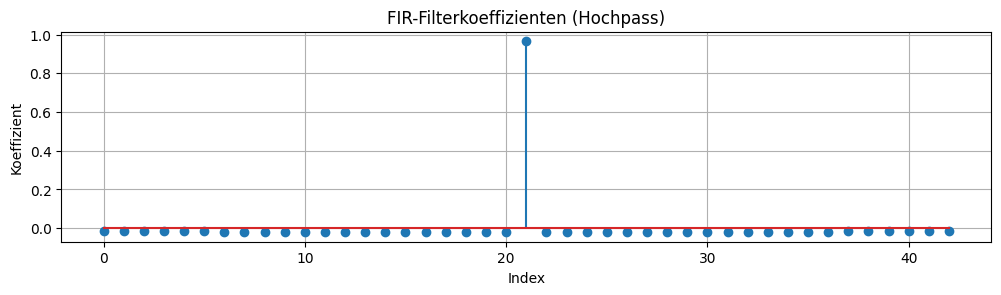

In [138]:
# Ergebnisse plotten
plt.figure(figsize=(12, 6))

# Plot der FIR-Koeffizienten
plt.subplot(2, 1, 1)
plt.stem(coefficients)
plt.title("FIR-Filterkoeffizienten (Hochpass)")
plt.xlabel("Index")
plt.ylabel("Koeffizient")
plt.grid()

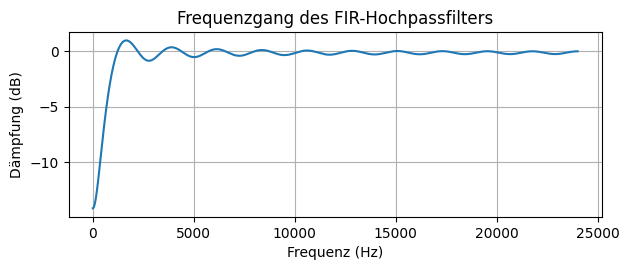

In [139]:
# Plot des Frequenzgangs
plt.subplot(2, 1, 2)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title("Frequenzgang des FIR-Hochpassfilters")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Dämpfung (dB)")
plt.grid()
plt.tight_layout()
plt.show()

In [140]:
# Export der Filterkoeffizienten in eine Textdatei
with open("fir_coefficients.txt", "w") as file:
    for coeff in coefficients:
        file.write(f"{coeff}\n")

print("FIR-Filterkoeffizienten wurden berechnet und in 'fir_coefficients.txt' gespeichert.")

FIR-Filterkoeffizienten wurden berechnet und in 'fir_coefficients.txt' gespeichert.
